In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [41]:
len(df)

11914

In [42]:
# Adding underscore in column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [43]:
# Selecting string column
string_columns = list(df.dtypes[df.dtypes == "object"].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [44]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [45]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


In [46]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

<AxesSubplot:xlabel='msrp', ylabel='Count'>

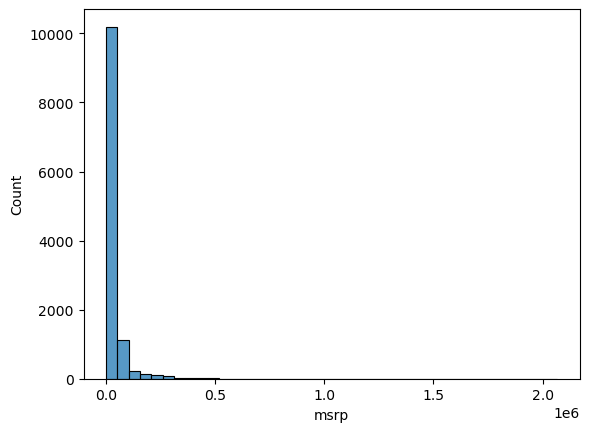

In [47]:
sns.histplot(df.msrp, bins = 40)

d:\Miniconda\envs\datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='msrp', ylabel='Density'>

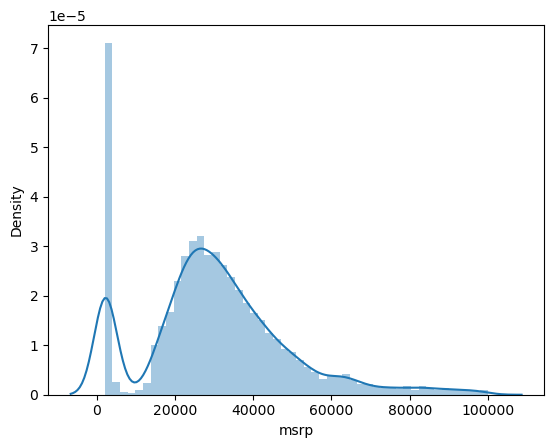

In [48]:
# Look by zooming
sns.distplot(df.msrp[df.msrp<100000])

<AxesSubplot:xlabel='msrp', ylabel='Count'>

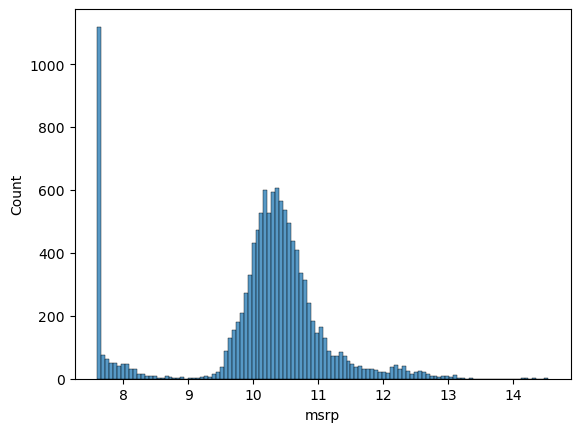

In [49]:
# Remove longer tail by log transformation
# +1 is important for 0 values 
from math import log1p


log_price = np.log1p(df.msrp)
sns.histplot(log_price)

In [50]:
# Check missing values 
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [51]:
# Splitting data into train, test and val

n = len(df)
n_val = int(n * 0.2)
n_test= int(n * 0.2)
n_train = n - (n_val + n_test)

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

### Linear regression

In [52]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
n = 3

def dot(xi, w):
    n = len(w)
    result = 0.0
    for j in range(n):
        result = result + xi[j] * w[j]
    return result

xi = [453, 11, 86]
7.17+dot(xi, w)

12.312000000000001

In [53]:
def linear_regression(xi):
    return w0 + np.dot(xi, w)

linear_regression

<function __main__.linear_regression(xi)>

In [54]:
xi = [453, 11, 86]
[1] + xi

[1, 453, 11, 86]

In [55]:
X = [
    [1, 148, 24, 1385],
    [1, 132, 25, 2031],
    [1, 453, 11, 86]
]

w = [0.01, 0.04, 0.002, 0.0001]

predictions = []

for xi in X:
    pred = np.dot(xi, w)
    predictions.append(pred)

np.exp(predictions)

array([4.53275451e+02, 2.55468726e+02, 7.70989331e+07])

$$w = (X^T.X)^{-1} X^T.y $$

In [56]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = np.dot(X.T, X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [57]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [58]:
base = ["engine_hp", "engine_cylinders", "highway_mpg", 'city_mpg', 'popularity']
df_num = df_train[base]

In [59]:
df_num = df_num.fillna(0)

In [60]:
X_train = df_num.values
X_train.shape

(7150, 5)

In [61]:
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + np.dot(X_train, w)


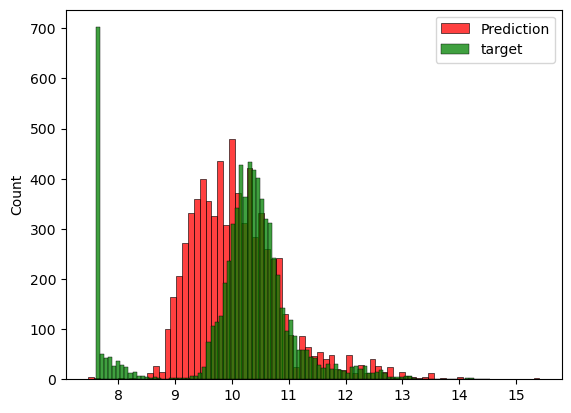

In [62]:
sns.histplot(y_pred, label = "Prediction", color="red")
sns.histplot(y_train, label = "target", color = "green")
plt.legend()

In [63]:
### Calculate rmse

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error **2).mean()
    return np.sqrt(mse)

In [64]:
rmse(y_train, y_pred)

0.7554192603920132

### Validating model

In [65]:
df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

In [66]:
y_pred = w0 + np.dot(X_val, w)

In [67]:
rmse(y_val, y_pred)

1.0868088276302297

In [68]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    x = df_num.values
    return x

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + np.dot(X_val, w)
rmse(y_val, y_pred)

0.7616530991301601

### Feature engineering 

In [69]:
df_train['age'] = 2022 - df_train.year

In [70]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')
    df_num = df[features]
    df_num = df_num.fillna(0)
    x = df_num.values
    return x
    
    

In [71]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + np.dot(X_val, w)
rmse(y_val, y_pred)

0.5172055461058335

### Handling categorical variables

In [72]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp', 'age'],
      dtype='object')

In [73]:
df_train.number_of_doors.value_counts()

4.0    5000
2.0    1916
3.0     228
Name: number_of_doors, dtype: int64

In [75]:
for v in [2,3,4]:
    print("num_doors_%s" %v)

num_doors_2
num_doors_3
num_doors_4


In [76]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
        
    for v in ['regular_unleaded', 'premium_unleaded_(required)',
            'premium_unleaded_(recommended)',
            'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        
    for v in ['front_wheel_drive', 'rear_wheel_drive',
                'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury',
            'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)
        
    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible',
            '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature) 
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X   

In [77]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 830.8920785817741


### Regulisation



In [78]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [80]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, -694700695602717184.00, 278.96, 694700695602667008.00
0.001, 7.19, -0.10, 1.81
 0.01, 7.18, -0.10, 1.81
  0.1, 7.05, -0.10, 1.78
    1, 6.22, -0.10, 1.56
   10, 4.39, -0.09, 1.08


In [81]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.46022676266043516


In [82]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4602255729429436
0.0001 0.4602254945347706
 0.001 0.46022676266043516
  0.01 0.46023949632611183
   0.1 0.46037006958137333
     1 0.4618298042653896
     5 0.4684079627533808
    10 0.4757248100693528


In [83]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.46023949632611183
test: 0.4571813679692604


In [84]:
ad = {
'city_mpg': 18,
'driven_wheels': 'all_wheel_drive',
'engine_cylinders': 6.0,
'engine_fuel_type': 'regular_unleaded',
'engine_hp': 268.0,
'highway_mpg': 25,
'make': 'toyota',
'market_category': 'crossover,performance',
'model': 'venza',
'number_of_doors': 4.0,
'popularity': 2031,
'transmission_type': 'automatic',
'vehicle_size': 'midsize',
'vehicle_style': 'wagon',
'year': 2013
}

df_test = pd.DataFrame([ad])
X_test = prepare_X(df_test)

In [85]:
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

array([28294.13591226])